In [1]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading Data
data=pd.read_csv("mktmix.csv")
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860


In [3]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860


In [4]:
data.shape

(104, 7)

In [5]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.00,104.00,100.00,104.00,104.00,104.00,104.00
mean,20171.07,15.31,256.69,32.92,0.02,141.01,2.55
std,1578.60,0.53,86.99,13.68,0.03,42.95,0.31
min,17431.00,13.74,0.00,10.78,0.00,37.66,1.82
25%,19048.75,15.03,235.00,22.18,0.00,117.11,2.32
50%,19943.50,15.33,278.50,31.16,0.00,138.58,2.50
75%,20942.75,15.64,313.25,41.08,0.05,175.68,2.81
max,24944.00,16.28,399.00,68.12,0.09,240.29,3.16


In [6]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout'],
      dtype='object')

In [7]:
data.dtypes

NewVolSales      int64
Base_Price     float64
Radio          float64
InStore        float64
Discount       float64
TV             float64
Stout          float64
dtype: object

In [8]:
print(data["Base_Price"].describe())

count   104.00
mean     15.31
std       0.53
min      13.74
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64


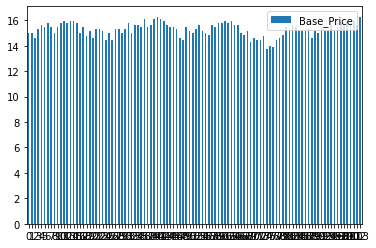

In [9]:
ax = data.plot.bar(y='Base_Price', rot=0)


In [10]:
data['Base_Price'].quantile(np.arange(0,1,0.1))

0.00   13.74
0.10   14.59
0.20   14.97
0.30   15.03
0.40   15.18
0.50   15.33
0.60   15.49
0.70   15.64
0.80   15.80
0.90   15.96
Name: Base_Price, dtype: float64

In [11]:
q = data['Base_Price'].quantile(0.01)

In [12]:
print(q)

13.8779529113


In [13]:
data[data.Base_Price < q]

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
74,24468,13.74,251.00,37.84,0.05,135.15,2.66
76,21710,13.87,261.00,34.22,0.00,148.71,2.98


In [14]:
avg =data['Base_Price'].mean()
avg

15.306739735384603

In [15]:
data.loc[(data["Base_Price"]<q), 'Base_Price'] = avg

In [16]:
data['Base_Price'].describe()

count   104.00
mean     15.34
std       0.48
min      14.01
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64

In [17]:
data['NewVolSales'].describe()


count     104.00
mean    20171.07
std      1578.60
min     17431.00
25%     19048.75
50%     19943.50
75%     20942.75
max     24944.00
Name: NewVolSales, dtype: float64

In [18]:
#new = data.loc[(data["NewVolSales"]>20050.53)]
#nl = list(new.index)
#data.drop(nl,axis = 0)

In [19]:
data['Radio '].describe()

count   100.00
mean    256.69
std      86.99
min       0.00
25%     235.00
50%     278.50
75%     313.25
max     399.00
Name: Radio , dtype: float64

In [20]:
R = data['Radio ']
Rd = DataFrame(R)

In [21]:
type(R)

pandas.core.series.Series

In [22]:
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Rd)
X = pd.DataFrame(data = imp.transform(Rd))

In [23]:
data = pd.concat([data,X],axis = 1)

In [24]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,0
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00


In [25]:
data.rename(columns={0:"NRadio"}, inplace=True)
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00


In [26]:
#df.drop('Radio', axis=1, inplace=True)

In [27]:
#Another way
data['Radio '].isnull().sum()

4

In [28]:
# Replace Missing values 
data['Radio']=data['Radio '].fillna(data['Radio '].mean())


In [29]:
data

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00,245.00
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00,314.00
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00,324.00
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00,298.00
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00,279.00
...,...,...,...,...,...,...,...,...,...
99,18335,15.96,292.00,29.48,0.00,71.61,3.09,292.00,292.00
100,19054,15.64,NaN,48.61,0.05,135.09,2.66,256.69,256.69
101,18198,15.96,NaN,29.32,0.04,176.96,2.93,256.69,256.69
102,20495,15.64,NaN,50.94,0.06,164.53,2.54,256.69,256.69


In [30]:
data['Radio'].describe()

count   104.00
mean    256.69
std      85.29
min       0.00
25%     235.75
50%     276.00
75%     312.25
max     399.00
Name: Radio, dtype: float64

In [31]:
data

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00,245.00
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00,314.00
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00,324.00
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00,298.00
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00,279.00
...,...,...,...,...,...,...,...,...,...
99,18335,15.96,292.00,29.48,0.00,71.61,3.09,292.00,292.00
100,19054,15.64,NaN,48.61,0.05,135.09,2.66,256.69,256.69
101,18198,15.96,NaN,29.32,0.04,176.96,2.93,256.69,256.69
102,20495,15.64,NaN,50.94,0.06,164.53,2.54,256.69,256.69


In [32]:
#Visualization

<AxesSubplot:xlabel='NewVolSales', ylabel='Base_Price'>

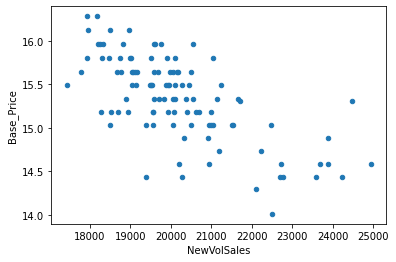

In [33]:
# Base Price
data.plot(x="NewVolSales",y="Base_Price",kind="scatter")

<AxesSubplot:xlabel='NewVolSales', ylabel='Radio'>

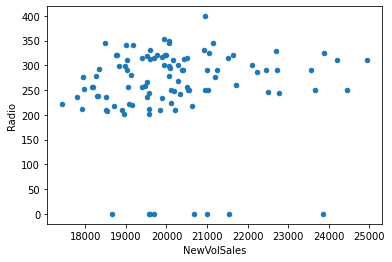

In [34]:
#Radio
data.plot(x="NewVolSales",y="Radio",kind="scatter")

In [35]:
pd.options.display.float_format = '{:.2f}'.format
data.corr()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio
NewVolSales,1.00,-0.68,0.05,0.44,0.42,0.15,-0.38,0.05,0.05
Base_Price,-0.68,1.00,-0.00,-0.24,-0.20,0.07,0.02,-0.00,-0.00
Radio,0.05,-0.00,1.00,-0.02,0.12,-0.06,-0.19,1.00,1.00
InStore,0.44,-0.24,-0.02,1.00,0.72,-0.02,0.03,-0.02,-0.02
Discount,0.42,-0.20,0.12,0.72,1.00,0.12,-0.03,0.11,0.11
TV,0.15,0.07,-0.06,-0.02,0.12,1.00,-0.13,-0.06,-0.06
Stout,-0.38,0.02,-0.19,0.03,-0.03,-0.13,1.00,-0.19,-0.19
NRadio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19,1.00,1.00
Radio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19,1.00,1.00


<AxesSubplot:>

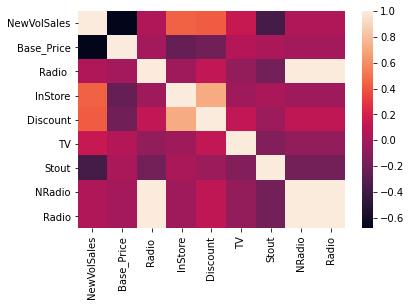

In [36]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [37]:
new = data.corr()
new.to_csv('corr.csv', sep=',')

In [38]:
data.rename(columns={'Website_Campaign ':'Website_Campaign'}, inplace=True)

In [39]:
data.rename(columns={'TV ':"TV"}, inplace=True)

In [40]:
data

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00,245.00
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00,314.00
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00,324.00
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00,298.00
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00,279.00
...,...,...,...,...,...,...,...,...,...
99,18335,15.96,292.00,29.48,0.00,71.61,3.09,292.00,292.00
100,19054,15.64,NaN,48.61,0.05,135.09,2.66,256.69,256.69
101,18198,15.96,NaN,29.32,0.04,176.96,2.93,256.69,256.69
102,20495,15.64,NaN,50.94,0.06,164.53,2.54,256.69,256.69


In [41]:
data['log_sales'] = np.log(data.NewVolSales)


In [42]:
# To see price as high, low, medium
def d(x):
    if x < 15:
        return "Low"
    elif 15< x < 15.33:
        return "Medium"
    else:
        return "High"
    

In [43]:
#backet pice
data['BKTPrice']=data['Base_Price'].map(d)

In [44]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio,log_sales,BKTPrice
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00,245.00,9.88,Medium
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00,314.00,9.87,Medium
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00,324.00,10.08,Low
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00,298.00,9.91,High
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00,279.00,9.91,High


In [45]:
data['BKTPrice'].value_counts()

High      60
Medium    25
Low       19
Name: BKTPrice, dtype: int64

In [46]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio,log_sales,BKTPrice
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00,245.00,9.88,Medium
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00,314.00,9.87,Medium
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00,324.00,10.08,Low
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00,298.00,9.91,High
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00,279.00,9.91,High


In [47]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout', 'NRadio', 'Radio', 'log_sales', 'BKTPrice'],
      dtype='object')

In [48]:
data["Offline"]=data['TV']+data['InStore']+ data['Radio']
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout', 'NRadio', 'Radio', 'log_sales', 'BKTPrice', 'Offline'],
      dtype='object')

In [49]:
import statsmodels.formula.api as smf

In [74]:
reg=smf.ols("NewVolSales~Base_Price+InStore+TV+Discount+Stout+Radio",data=data)

In [75]:
results=reg.fit()

In [76]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     40.47
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           2.55e-24
Time:                        20:50:01   Log-Likelihood:                -847.76
No. Observations:                 104   AIC:                             1710.
Df Residuals:                      97   BIC:                             1728.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.351e+04   2949.081     18.144      0.0

In [53]:
reg=smf.ols("NewVolSales~Base_Price+InStore+TV+Discount+Stout",data=data)

In [77]:
results=reg.fit()

In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     40.47
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           2.55e-24
Time:                        20:50:07   Log-Likelihood:                -847.76
No. Observations:                 104   AIC:                             1710.
Df Residuals:                      97   BIC:                             1728.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.351e+04   2949.081     18.144      0.0

In [79]:
predictions=results.predict(data)

In [80]:
actuals=data['NewVolSales']

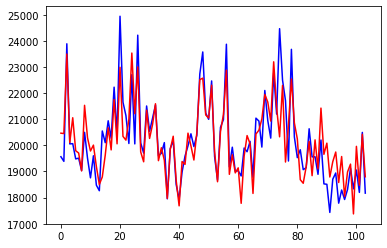

In [81]:
## Actual vs Predicted plot
plt.plot(actuals,"b")
plt.plot(predictions,"r")

In [82]:
residuals = results.resid
type(residuals)

pandas.core.series.Series

In [83]:
residualsdf = DataFrame(residuals)
residualsdf.rename(columns={0:"res"}, inplace=True)

([], [])

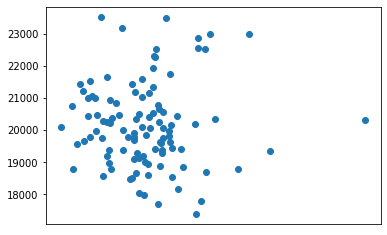

In [84]:

plt.scatter(residualsdf, predictions) 
plt.xticks([])
    

In [85]:
import sklearn.metrics as metrics

In [86]:
## Mean Absolute error
mae = metrics.mean_absolute_error(actuals,predictions)
mae

607.8136086857818

In [87]:
np.mean(abs((actuals - predictions)/actuals)) #MAPE

0.02981679542167379

In [88]:
#to design model we need patsy in Python
from patsy import dmatrices

In [89]:
 y, X = dmatrices('NewVolSales~Base_Price+InStore+TV+Discount+Stout', 
                  data=data, return_type='dataframe')

In [90]:
X.head()

,Intercept,Base_Price,InStore,TV,Discount,Stout
0,1.00,15.03,15.45,101.78,0.00,2.28
1,1.00,15.03,16.39,76.73,0.00,2.22
2,1.00,14.59,62.69,131.59,0.05,2.01
3,1.00,15.33,16.57,119.63,0.00,2.20
4,1.00,15.64,41.50,103.44,0.04,1.82


In [91]:
y.head()

,NewVolSales
0,19564.00
1,19387.00
2,23889.00
3,20055.00
4,20064.00


In [92]:
## VIF - variance inflation factor function
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [94]:
vif.round(1)

,VIF Factor,features
0,1173.20,Intercept
1,1.10,Base_Price
2,2.20,InStore
3,1.10,TV
4,2.20,Discount
5,1.00,Stout


In [95]:
#VIF should be less than 5. Here Instore and Discount are only two variables VIF < 5
# is a Python package for describing statistical models (especially linear models, or models that have a linear component)